# Import Librarys and Files

In [1]:
import ROOT as r
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from tqdm.notebook import tqdm 

import utils
import plotting_utils
from event_patterns import EventPatterns
from pattern import Pattern
from vertex import Vertex
from hit import Hit
from pattern_finding_helpers import PatternFindingHelpers

In [2]:
PI_ROOT_DICT_PATH = "/home/jack/large_projects/simulation/install/lib/libPiRootDict.so" #Change to match system path
r.gSystem.Load(PI_ROOT_DICT_PATH)

0

In [3]:
from utils import print_file_creation_time

file_pattern_finding = "/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_algor.root"  # CHANGE THIS
file_truth_pattern_finding = "/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_truth.root"  # CHANGE THIS

# Print creation time for each file
print_file_creation_time(file_pattern_finding)
print_file_creation_time(file_truth_pattern_finding)

file_pf=r.TFile(file_pattern_finding,"READ")
file_truth_pf=r.TFile(file_truth_pattern_finding,"READ")


The file '/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_algor.root' was created on: 2025-04-07 00:54:16
The file '/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_truth.root' was created on: 2025-04-07 00:54:16


# Create Python Structure from Event Data

## Create tracklets for an event

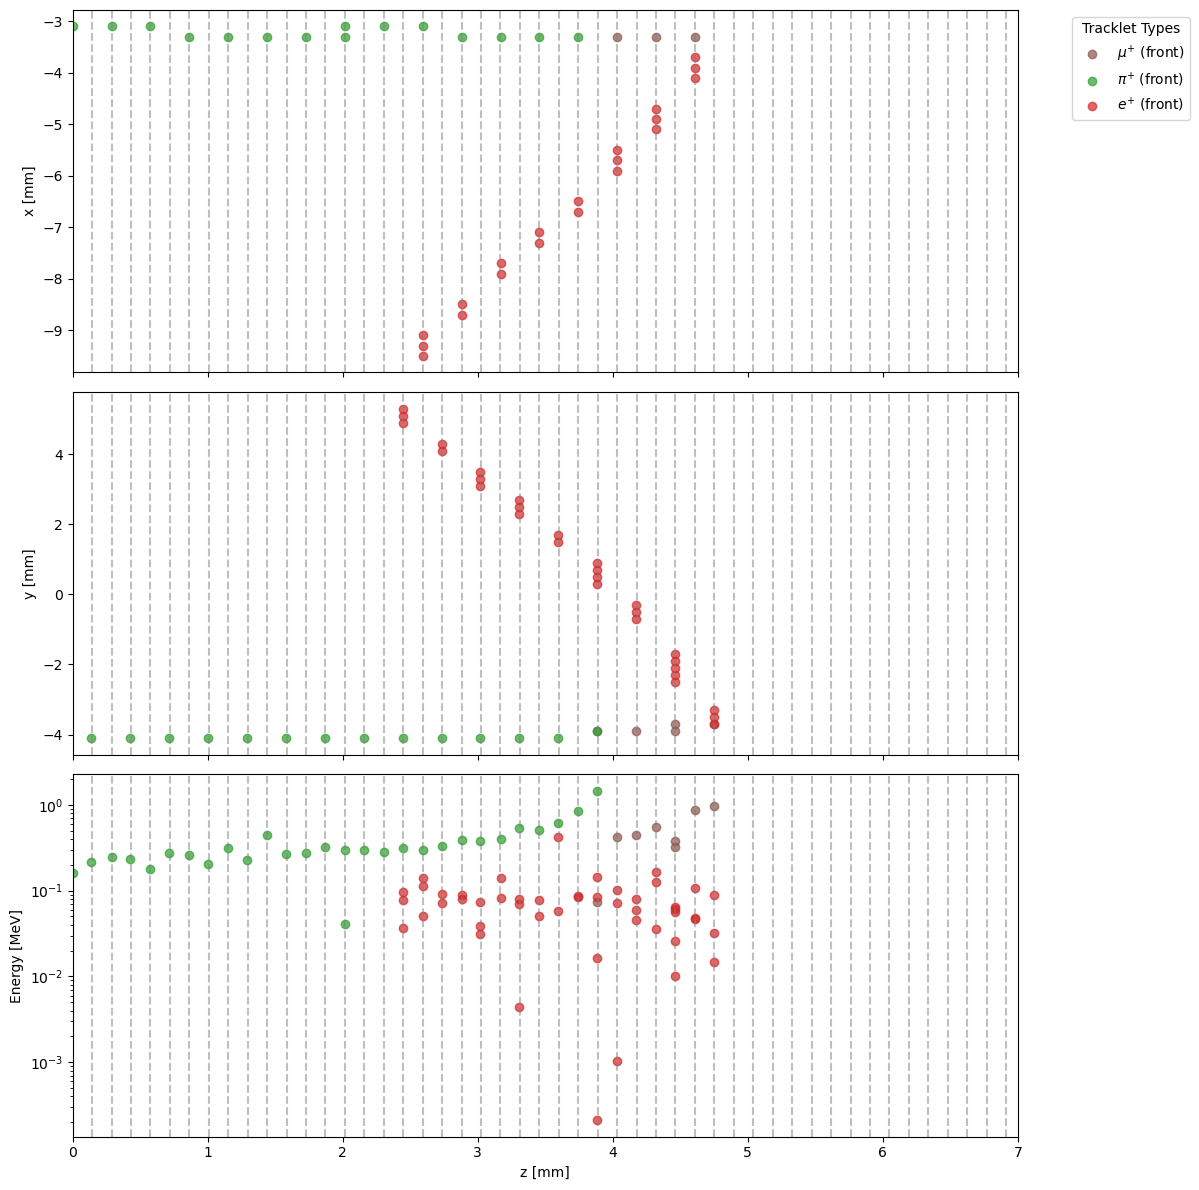

(<Figure size 1200x1200 with 3 Axes>,
 array([<Axes: ylabel='x [mm]'>, <Axes: ylabel='y [mm]'>,
        <Axes: xlabel='z [mm]', ylabel='Energy [MeV]'>], dtype=object))

In [4]:
# Initialize Helper Class with dummy functions to form verticies and patterns (we'll add them later)
pf_helpers = PatternFindingHelpers(lambda tracklets: set(), lambda vertices: set())

# Create tracklet objects for an event
tracklets = pf_helpers.create_tracklets(file_pf, 0)

# Plot the tracklets
reload(plotting_utils)
plotting_utils.plot_tracklets(tracklets)

## Create Vertices from Tracklets

Tracklet(id=0, particle_id=-13, name=\mu^{+}, color=#8C564B, e_id=3162, hits=8, is_incoming=None, delta_r=None, fit_keys=['min_z', 'max_z', 'y_z_fit', 'x_z_fit'], endpoints=(Point3D(x=-3.2999999523162837, y=-3.9307693481680204, z=3.883499927520752), Point3D(x=-3.2999999523162833, y=-3.72307703504434, z=4.747499771118164)))
Tracklet(id=1, particle_id=211, name=\pi^{+}, color=#2CA02C, e_id=3162, hits=29, is_incoming=None, delta_r=None, fit_keys=['min_z', 'max_z', 'y_z_fit', 'x_z_fit'], endpoints=(Point3D(x=-3.149999917660699, y=-4.12561495801517, z=0.000500000715255744), Point3D(x=-3.294456794660987, y=-4.04857138559526, z=3.883499927520752)))
Tracklet(id=2, particle_id=-11, name=e^{+}, color=#D62728, e_id=3162, hits=48, is_incoming=None, delta_r=None, fit_keys=['min_z', 'max_z', 'y_z_fit', 'x_z_fit'], endpoints=(Point3D(x=-9.771530517184479, y=5.455478794652807, z=2.443500108718872), Point3D(x=-3.736419473379632, y=-2.9742521576742504, z=4.747499771118164)))


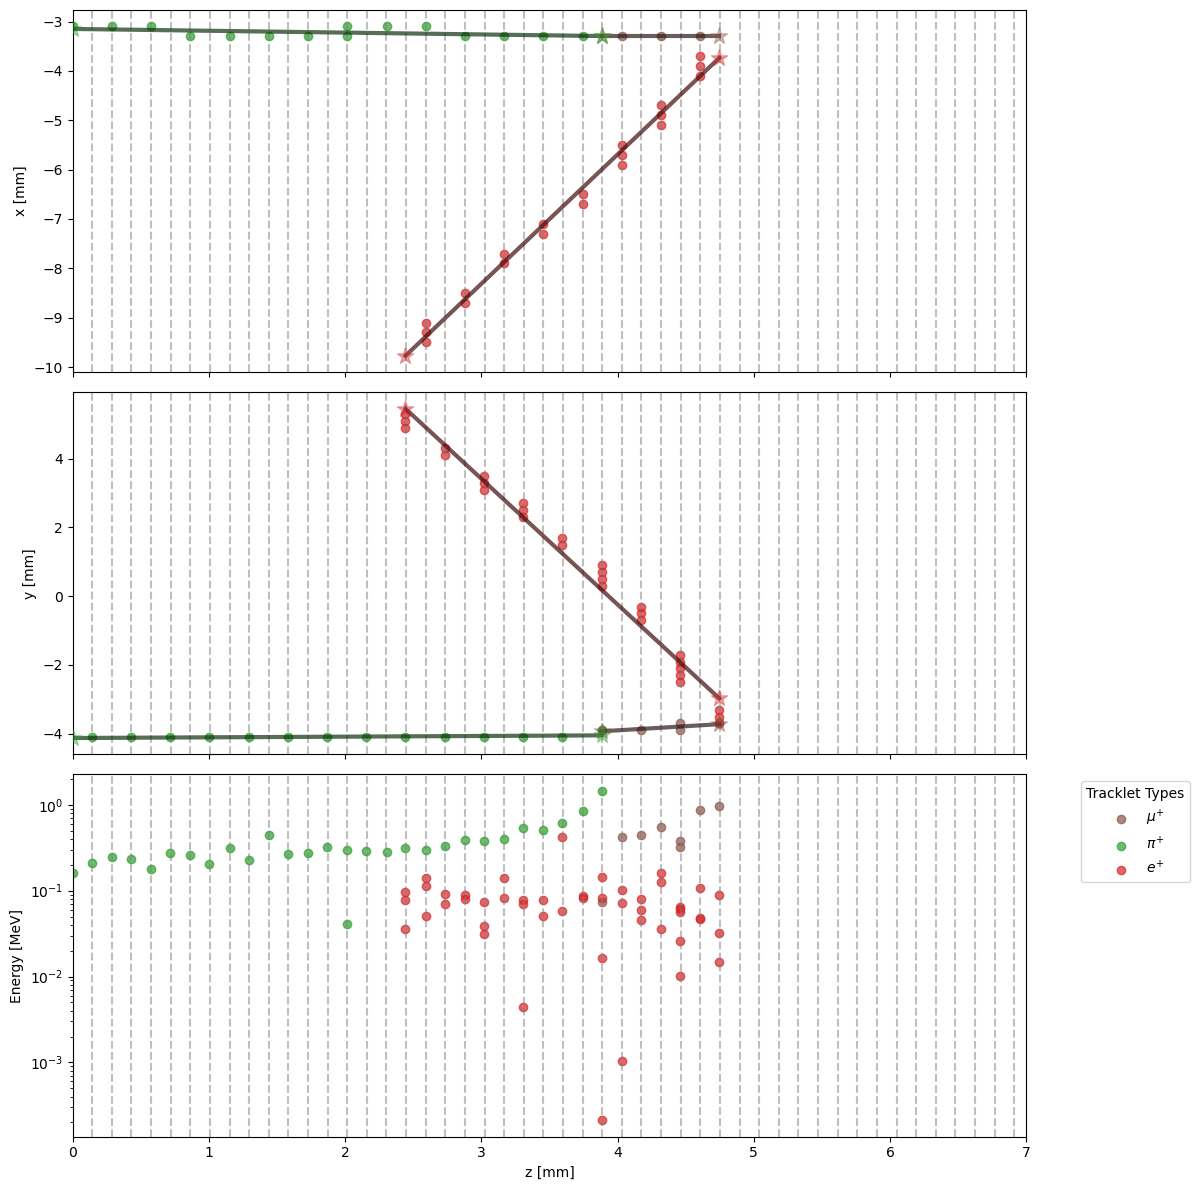

(<Figure size 1200x1200 with 3 Axes>,
 array([<Axes: ylabel='x [mm]'>, <Axes: ylabel='y [mm]'>,
        <Axes: xlabel='z [mm]', ylabel='Energy [MeV]'>], dtype=object))

In [6]:
reload(utils)
utils.form_vertices(tracklets)
for tracklet in tracklets:
    print(tracklet)
reload(plotting_utils)
plotting_utils.plot_tracklets(tracklets)